# Assignment 4
Create an iPython Notebook that contains the complete analysis and visualization process for your experimental data.
In particular, your notebook should contain the following parts:
- a title (markdown cell) “Reaction Time Analysis”
- a brief description of your experiment, containing the most important details about setup and participants (for an example
of how and what to document about your study, see the paper on the ‘Shift’ input technique mentined below).
- code which imports the raw data from a CSV file and extracts the relevant data for further processing (the CSV file should
be in the same directory)
- sensible headings that describe what happens in the following lines
- scatterplots showing reaction times for each of the conditions and for all conditions combined (color-coded).
- boxplots and t-test results
- a brief discussion of the most noteworthy results, including whether there are statistically significant differences between
attentive/pre-attentive and non-distracted/distracted conditions.

Hand in a file reaction_time_experiment.ipynb and one or more CSV files (data.csv or data1.csv … dataN.csv) which must
be in the same directory as the iPython notebook.

## Points
- 1 The iPython notebook has been submitted, is not empty, and does not print out error messages.
- 2 The notebook correctly reads the data from the file(s) and outputs the required visualizations
- 1 Visualizations are self-explaining and contain units and axis description.
- 1 The notebook is well-structured and generally follows the Python style guide (PEP 8).
- 2 The results are discussed in sufficient detail and clarity

# Reaction Time Analysis


- Brief description of out experiment (from assignment 3)
    - setup
    - participants
    - how and what




In [1]:
# Importing all needed modules
import numpy as np
import pandas as pd

%matplotlib inline
from pylab import *
rcParams['figure.figsize'] = (16,9)

In [2]:
# code which imports the raw data from a CSV file and extracts the relevant data for further processing
# (the CSV file should be in the same directory)
data = []
for i in range(1,5):
    data.append(np.genfromtxt('reaction_time_result_{}.csv'.format(i), dtype=None, delimiter=',', names=True))
    
data1, data2, data3, data4 = data

In [3]:
df = pd.read_csv('reaction_time_results.csv')
df.head()

,id,shown_stimulus,mental_complexity,distraction,pressed_key,correct_key_pressed,reaction_time_in_microseconds,timestamp
0,1,E,A,no,70,True,669923,1495531683
1,1,O,A,no,74,True,548242,1495531685
2,1,O,A,no,74,True,626938,1495531686
3,1,O,A,yes,74,True,640617,1495531687
4,1,R,P,no,74,True,667558,1495531688


Changing the order of the colums

In [4]:
ordered_header = ['id', 'timestamp', 'mental_complexity', 'distraction',
                  'shown_stimulus', 'reaction_time_in_microseconds', 
                  'pressed_key', 'correct_key_pressed']

df = df[ordered_header]
df.head()

,id,timestamp,mental_complexity,distraction,shown_stimulus,reaction_time_in_microseconds,pressed_key,correct_key_pressed
0,1,1495531683,A,no,E,669923,70,True
1,1,1495531685,A,no,O,548242,74,True
2,1,1495531686,A,no,O,626938,74,True
3,1,1495531687,A,yes,O,640617,74,True
4,1,1495531688,P,no,R,667558,74,True


Sorting colums by values

In [5]:
# df.sort_values(['Peak', 'Weeks'], ascending=[True, False], inplace=True)
df.sort_values(['id', 'mental_complexity'], ascending=[True, True], inplace=True)
df.head()

,id,timestamp,mental_complexity,distraction,shown_stimulus,reaction_time_in_microseconds,pressed_key,correct_key_pressed
0,1,1495531683,A,no,E,669923,70,True
1,1,1495531685,A,no,O,548242,74,True
2,1,1495531686,A,no,O,626938,74,True
3,1,1495531687,A,yes,O,640617,74,True
5,1,1495531689,A,yes,E,602681,70,True


In [6]:
cond_list = []
for row in df.iterrows():
    cur = row[1]['mental_complexity']
    if row[1]['distraction'] == 'yes':
        cur += 'D'
    else:
        cur += 'N'
    cur += row[1]['shown_stimulus']
    cond_list.append(cur)
df['condition'] = cond_list

In [40]:
attentive = df.loc[df['mental_complexity'] == 'A']
pre_attentive = df.loc[df['mental_complexity'] == 'P']

distraction = df.loc[df['distraction'] == 'yes']
no_distraction = df.loc[df['distraction'] == 'no']

#ane = df.loc[(df['mental_complexity'] == 'A') & (df['distraction'] == 'no') & (df['shown_stimulus'] == 'E')]
#ano = df.loc[(df['mental_complexity'] == 'A') & (df['distraction'] == 'no') & (df['shown_stimulus'] == 'O')]

#ade = df.loc[(df['mental_complexity'] == 'A') & (df['distraction'] == 'yes') & (df['shown_stimulus'] == 'E')]
#ado = df.loc[(df['mental_complexity'] == 'A') & (df['distraction'] == 'yes') & (df['shown_stimulus'] == 'O')]

#pnb = df.loc[(df['mental_complexity'] == 'P') & (df['distraction'] == 'no') & (df['shown_stimulus'] == 'B')]
#pnr = df.loc[(df['mental_complexity'] == 'P') & (df['distraction'] == 'no') & (df['shown_stimulus'] == 'R')]

#pdb = df.loc[(df['mental_complexity'] == 'P') & (df['distraction'] == 'yes') & (df['shown_stimulus'] == 'B')]
#pdr = df.loc[(df['mental_complexity'] == 'P') & (df['distraction'] == 'yes') & (df['shown_stimulus'] == 'R')]




ane = df.loc[df['condition'] == 'ANE']
ano = df.loc[df['condition'] == 'ANO']

ade = df.loc[df['condition'] == 'ADE']
ado = df.loc[df['condition'] == 'ADO']

pnb = df.loc[df['condition'] == 'PNB']
pnr = df.loc[df['condition'] == 'PNR']

pdb = df.loc[df['condition'] == 'PDB']
pdr = df.loc[df['condition'] == 'PDR']


# scatterplots showing reaction times for each of the conditions and for all conditions combined (color-coded).
## conditions
- ANE
- ANO
- ADE
- ADO
- PNB
- PNR
- PDB
- PDR

In [8]:
condition_names = ['ANE', 'ANO', 'ADE', 'ADO', 'PNB', 'PNR', 'PDB', 'PDR'] 
conditions = [ane, ano, ade, ado, pnb, pnr, pdb, pdr]

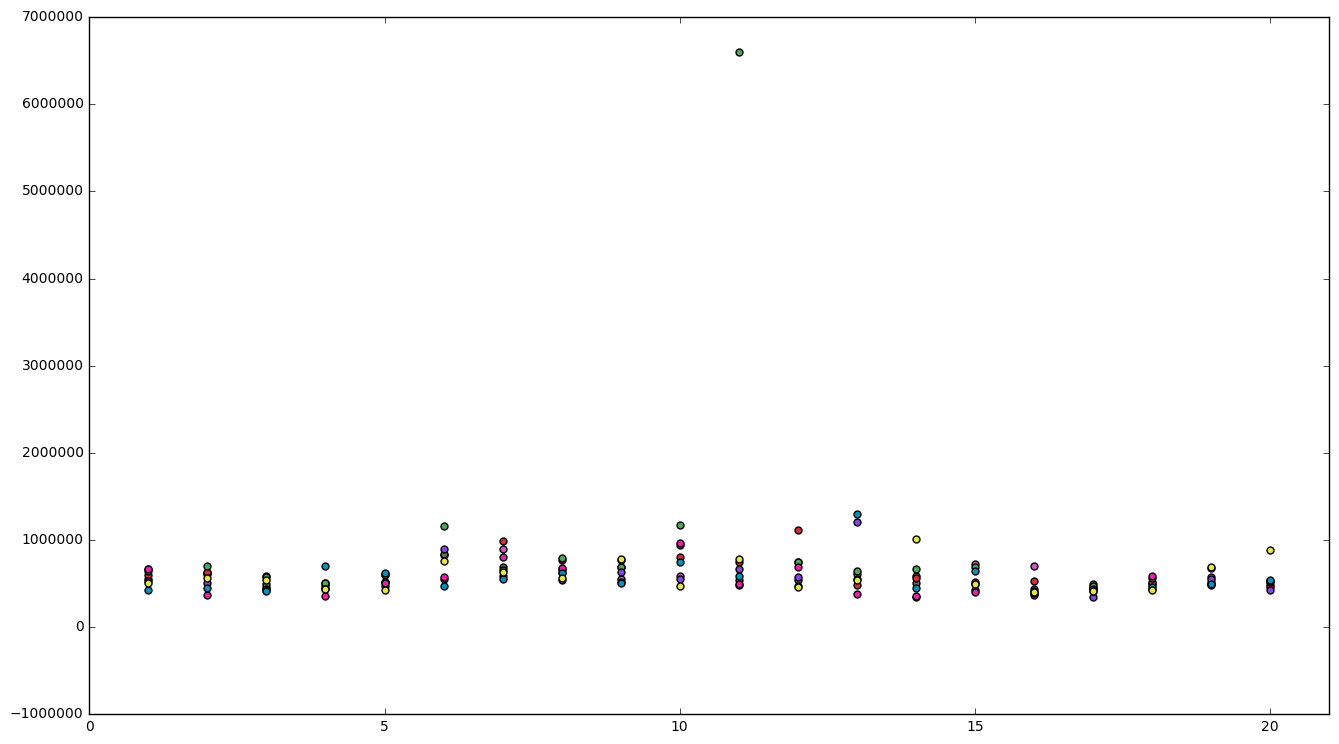

In [9]:
for condition in conditions:
    y = condition['reaction_time_in_microseconds']
    x = range(1, len(y)+1)
    # color = np.random.rand()
    # colors = [color for i in x]
    # colors = np.random.rand(len(y))
    colors = np.full((len(y)), np.random.rand())
    scatter(x, y, s=25, c=np.random.rand(3,1));
xlim([0,len(y)+1]);

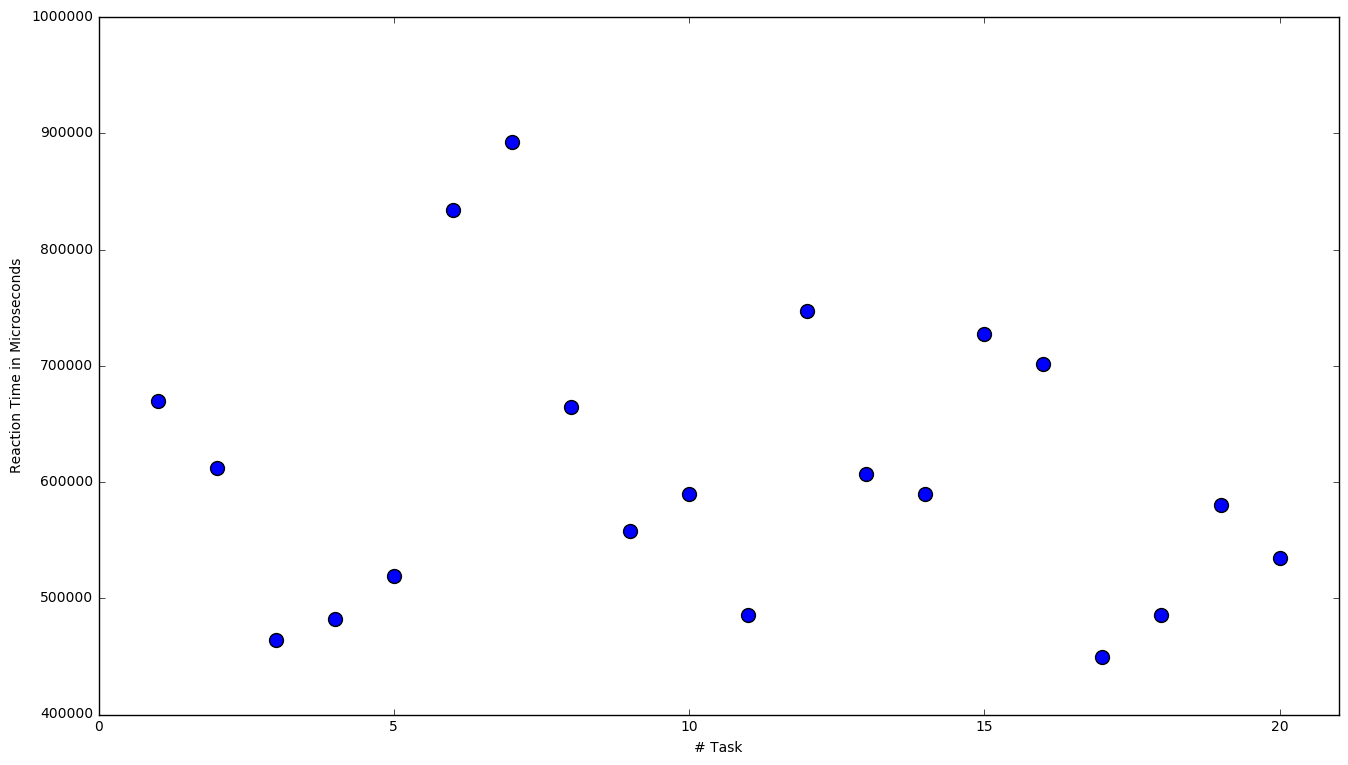

In [10]:
scatter(x, conditions[0]['reaction_time_in_microseconds'], s=100);
xlabel("# Task")
ylabel("Reaction Time in Microseconds")
xlim([0,len(conditions[0])+1]);

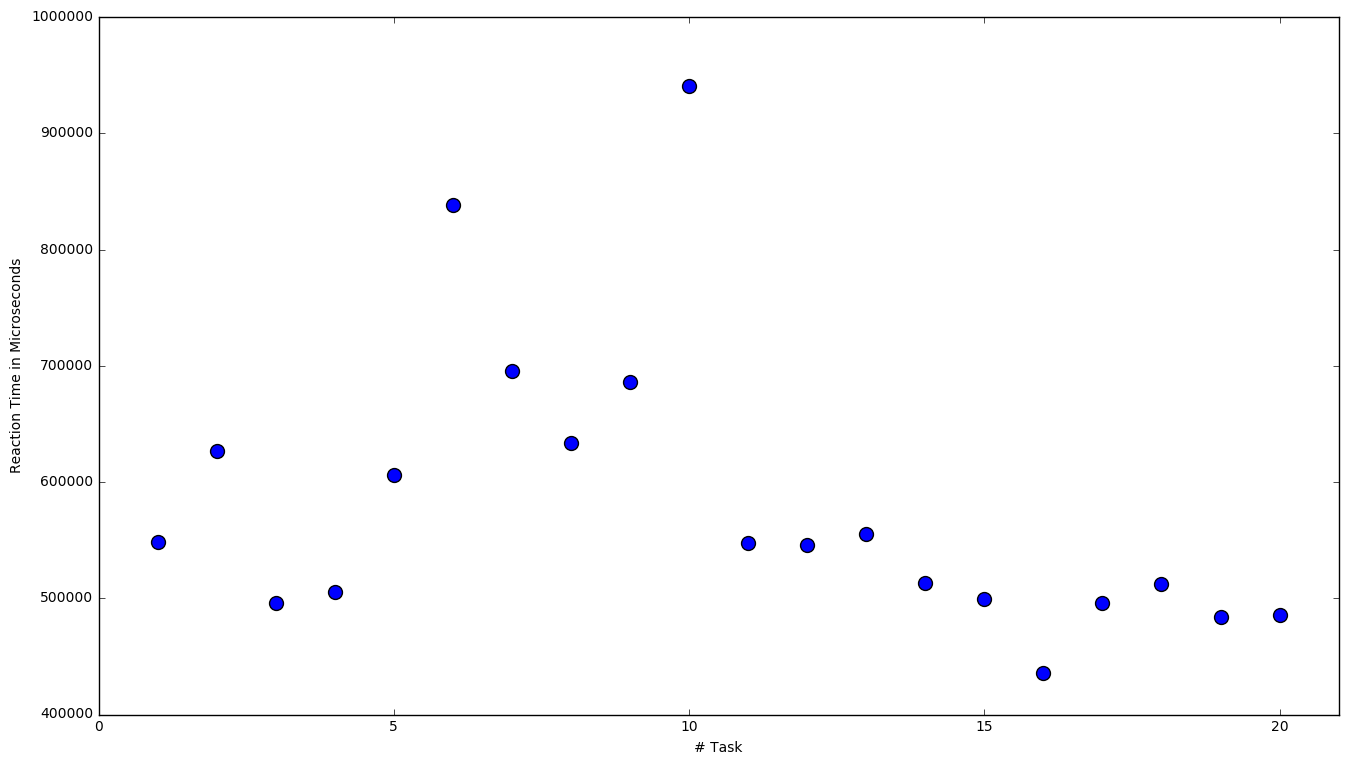

In [11]:
scatter(x, conditions[1]['reaction_time_in_microseconds'], s=100);
xlabel("# Task")
ylabel("Reaction Time in Microseconds")
xlim([0,len(conditions[1])+1]);

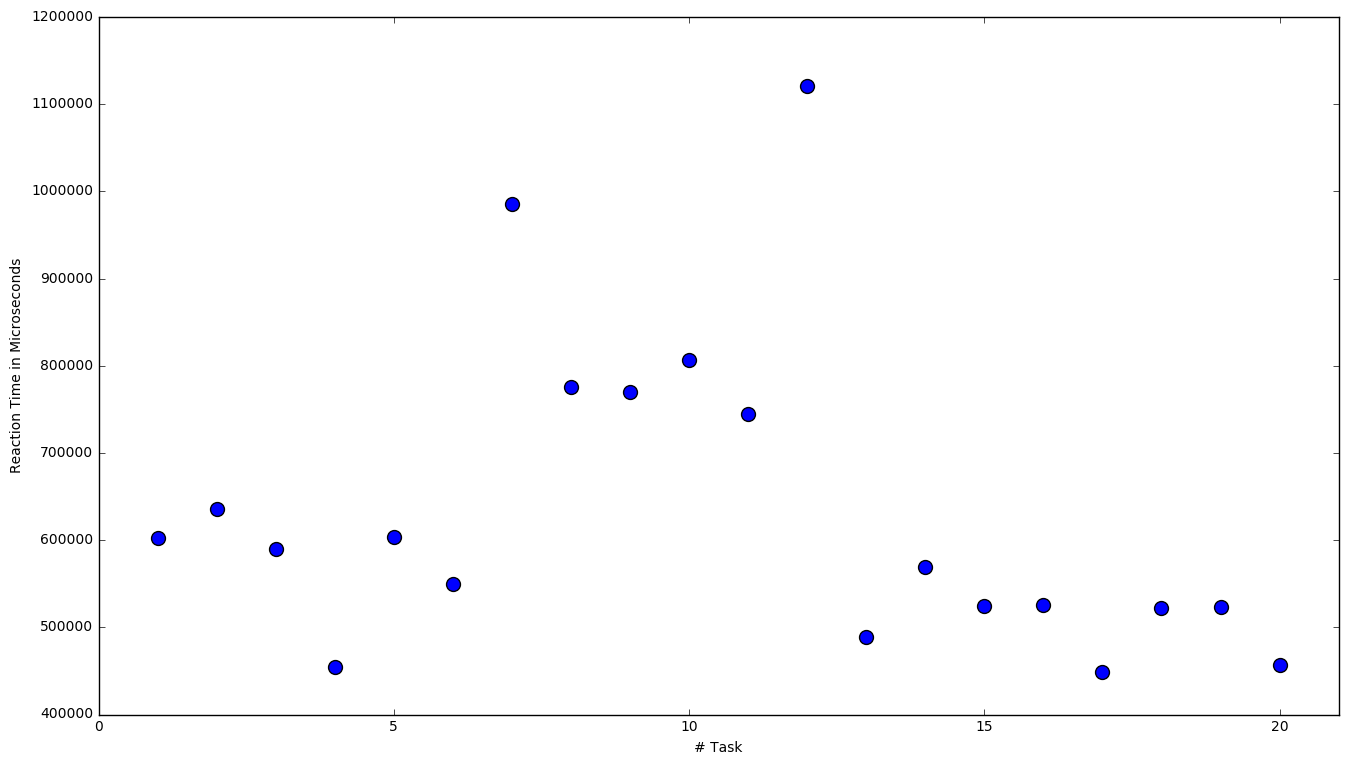

In [12]:
scatter(x, conditions[2]['reaction_time_in_microseconds'], s=100);
xlabel("# Task")
ylabel("Reaction Time in Microseconds")
xlim([0,len(conditions[2])+1]);

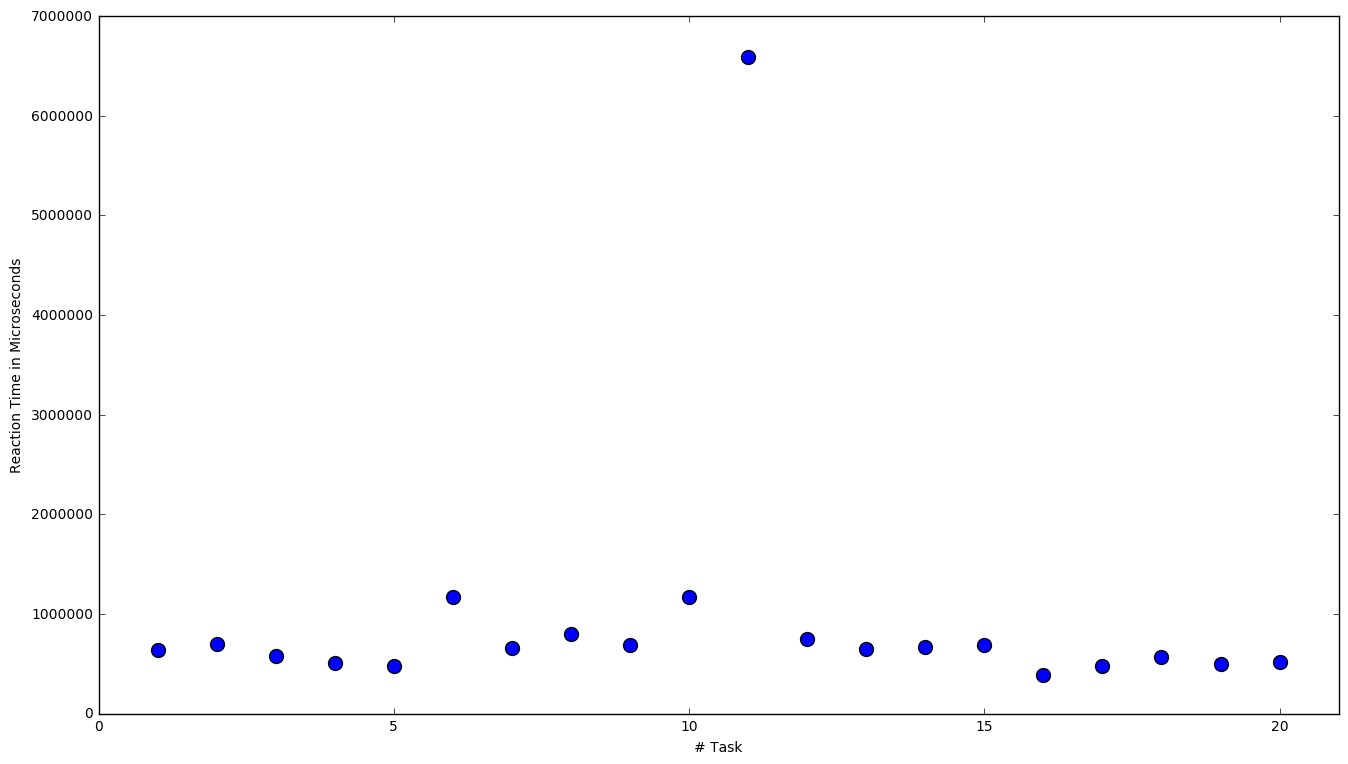

In [13]:
scatter(x, conditions[3]['reaction_time_in_microseconds'], s=100);
xlabel("# Task")
ylabel("Reaction Time in Microseconds")
xlim([0,len(conditions[3])+1]);

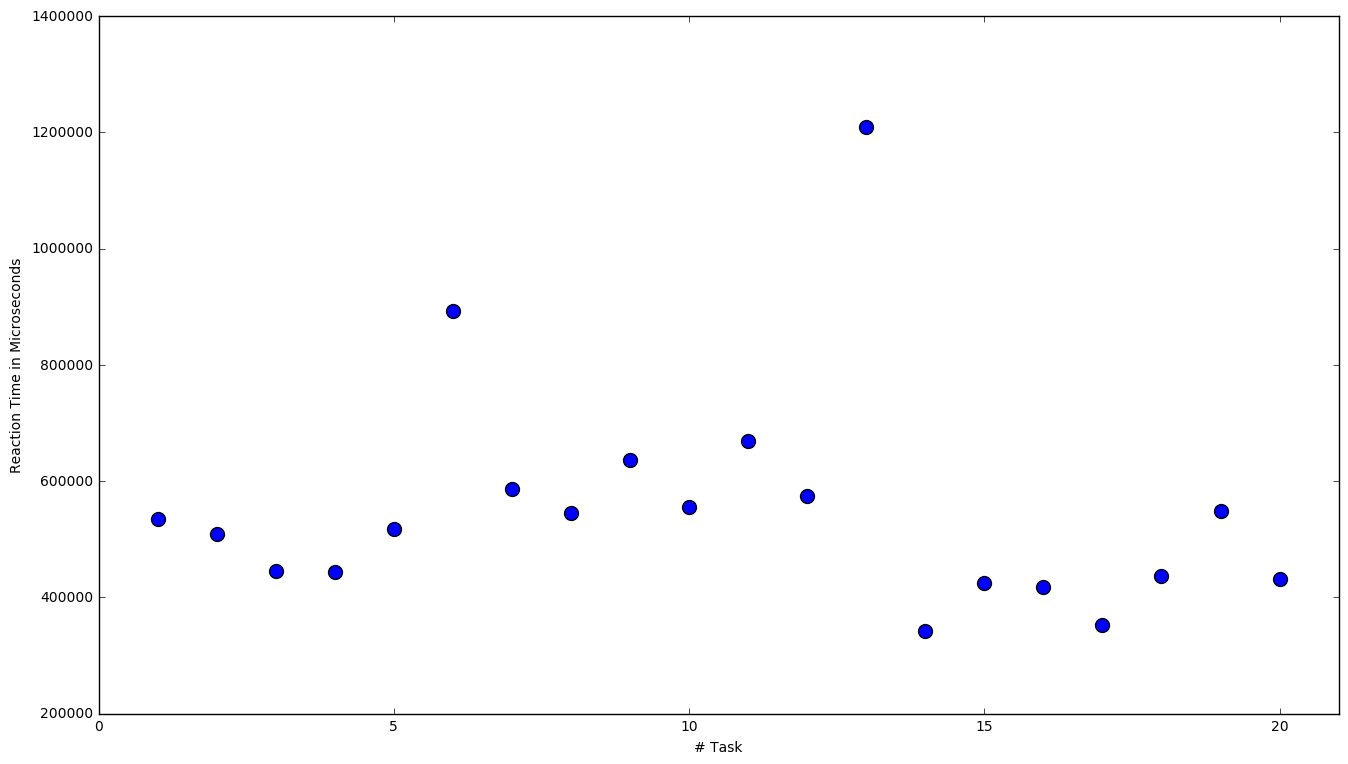

In [14]:
scatter(x, conditions[4]['reaction_time_in_microseconds'], s=100);
xlabel("# Task")
ylabel("Reaction Time in Microseconds")
xlim([0,len(conditions[4])+1]);

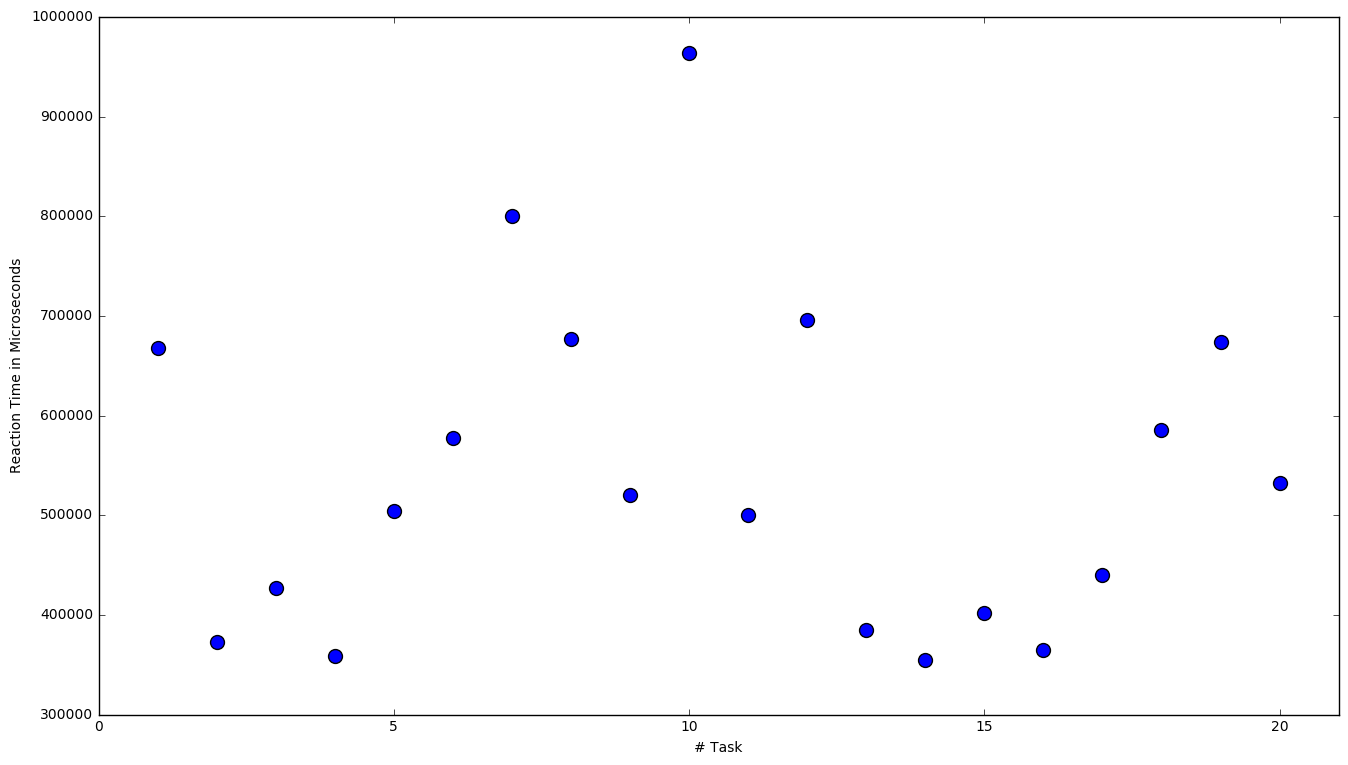

In [15]:
scatter(x, conditions[5]['reaction_time_in_microseconds'], s=100);
xlabel("# Task")
ylabel("Reaction Time in Microseconds")
xlim([0,len(conditions[5])+1]);

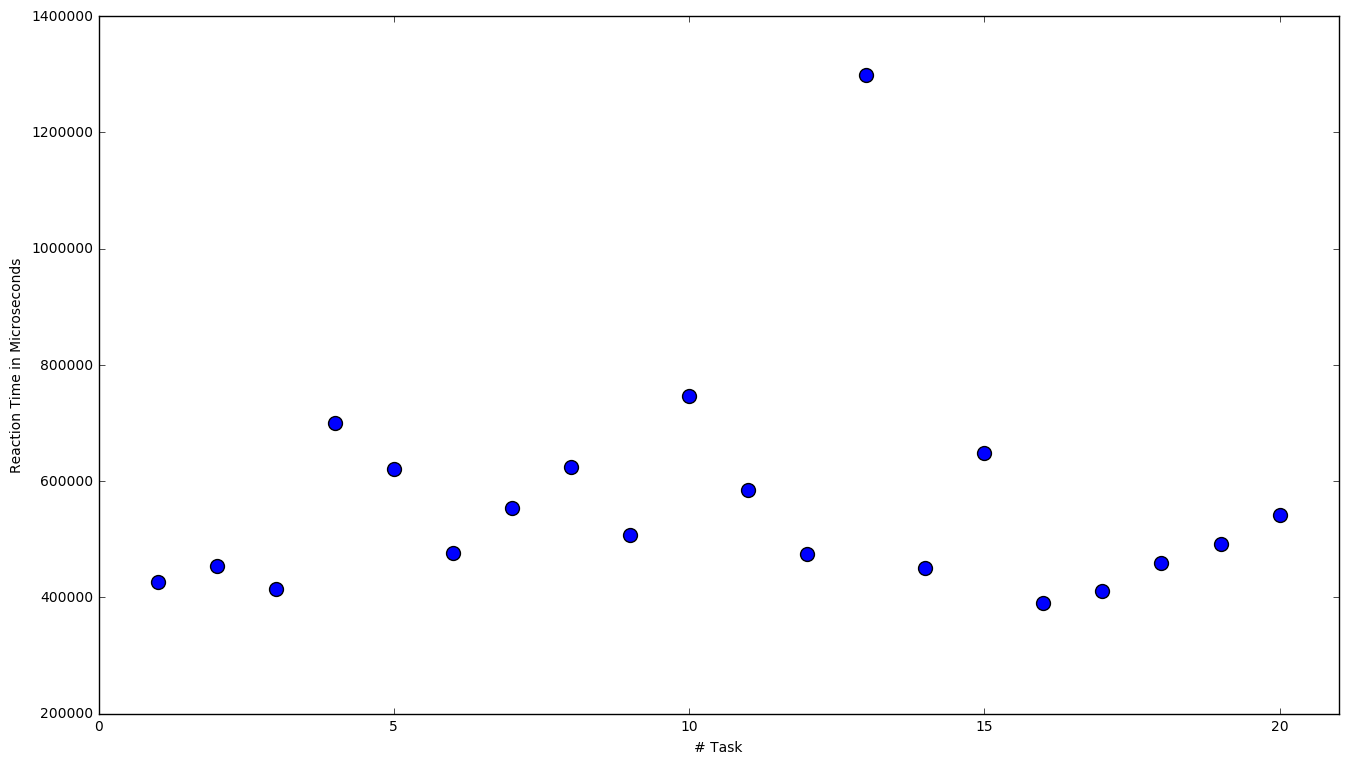

In [16]:
scatter(x, conditions[6]['reaction_time_in_microseconds'], s=100);
xlabel("# Task")
ylabel("Reaction Time in Microseconds")
xlim([0,len(conditions[6])+1]);

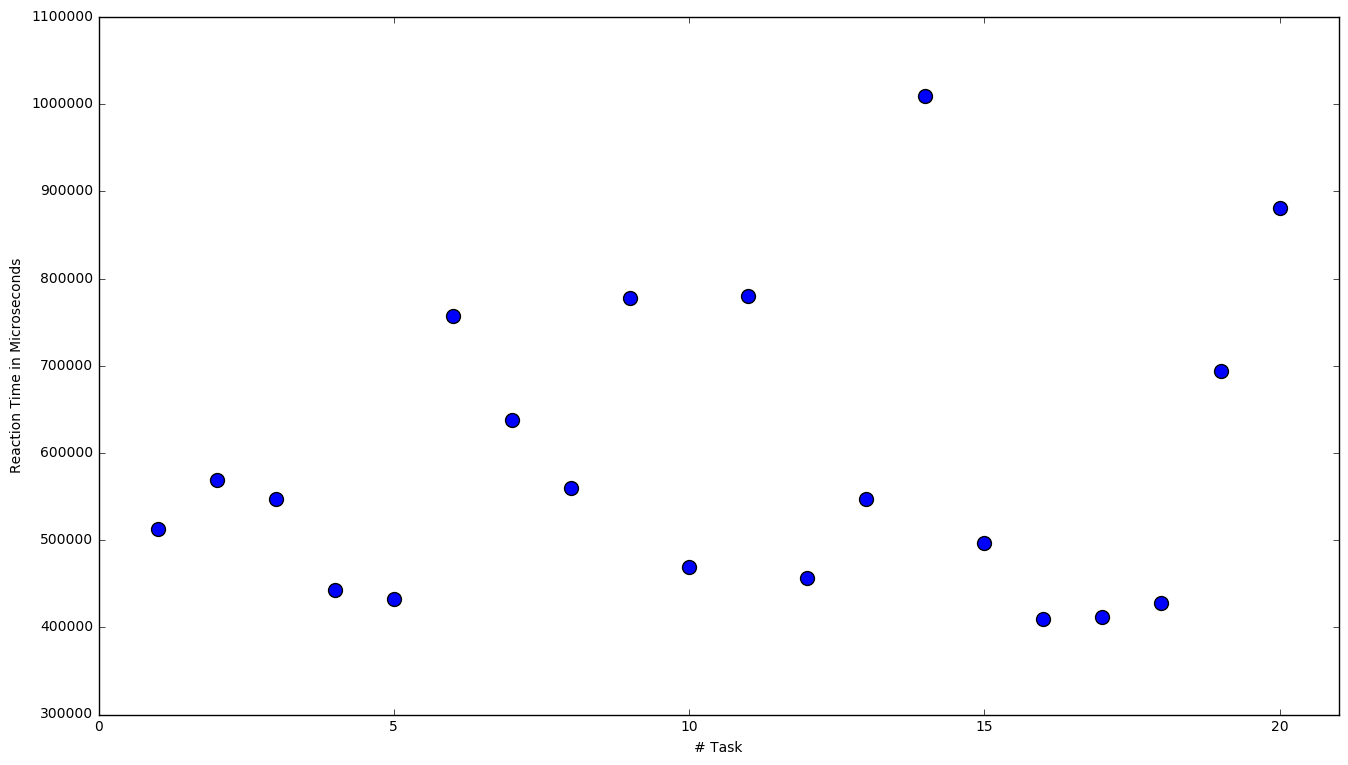

In [17]:
scatter(x, conditions[7]['reaction_time_in_microseconds'], s=100);
xlabel("# Task")
ylabel("Reaction Time in Microseconds")
xlim([0,len(conditions[7])+1]);

In [18]:
# https://stackoverflow.com/questions/31883097/elegant-way-to-match-a-string-to-a-random-color-matplotlib

In [19]:
cmap = plt.get_cmap('Accent')
colors = cmap(np.linspace(0, 1, len(condition_names)))

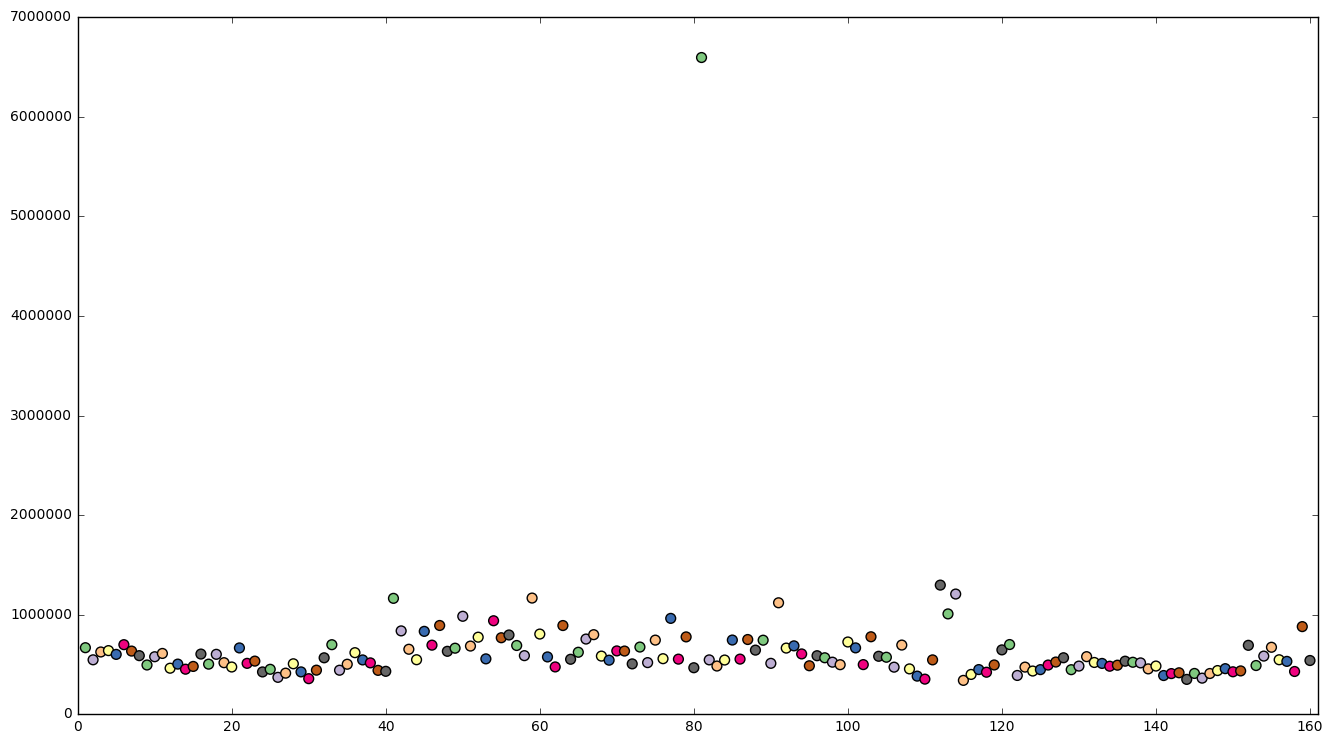

In [20]:
scatter(range(1, len(df['reaction_time_in_microseconds'])+1), df['reaction_time_in_microseconds'], s=50, c=colors);
xlim([0,len(df)+1]);

In [21]:
# boxplots 

In [22]:
bpdata = [cond['reaction_time_in_microseconds'] for cond in conditions]

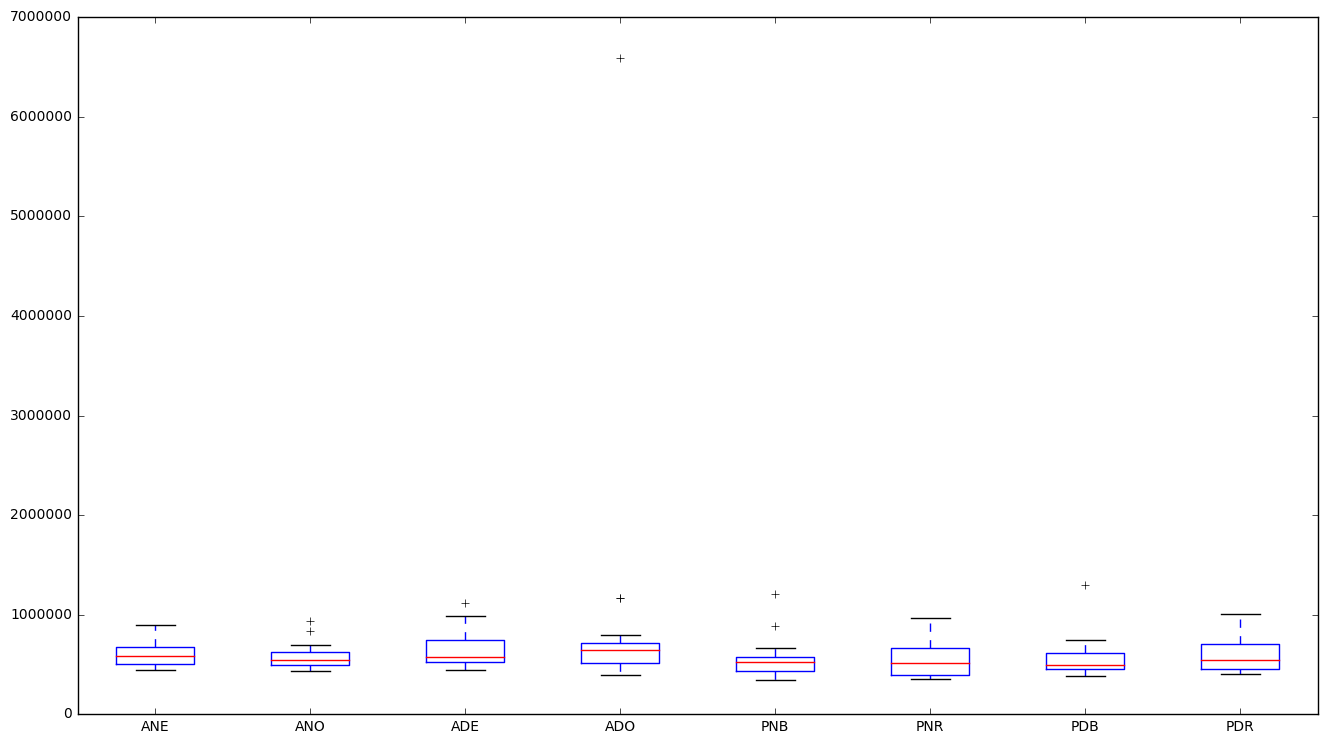

In [23]:
boxplot(bpdata);
plt.xticks([1,2,3,4,5,6,7,8], condition_names);

In [24]:
# t-test results

In [25]:
from scipy.stats import ttest_ind

In [26]:
t_statistic, p_value = ttest_ind(ane['reaction_time_in_microseconds'], ano['reaction_time_in_microseconds'])
print("p-value: %2.30f" %(p_value))

p-value: 0.496667349490032439263131891494


In [38]:
for condition in conditions:
    condition_name = condition['condition'].iloc[0]
    for cond in conditions:
        cond_name = cond['condition'].iloc[0]
        t_statistic, p_value = ttest_ind(condition['reaction_time_in_microseconds'], cond['reaction_time_in_microseconds'])
        print(condition_name, cond_name, "p-value: %2.30f" %(p_value))

ANE ANE p-value: 1.000000000000000000000000000000
ANE ANO p-value: 0.496667349490032439263131891494
ANE ADE p-value: 0.610371766158638306976058629516
ANE ADO p-value: 0.254175144931670149439639772027
ANE PNB p-value: 0.286013385495379302003726706971
ANE PNR p-value: 0.141052824428382461707798256612
ANE PDB p-value: 0.384875607045581213938589826284
ANE PDR p-value: 0.694019352122043020614228225895
ANO ANE p-value: 0.496667349490032439263131891494
ANO ANO p-value: 1.000000000000000000000000000000
ANO ADE p-value: 0.296186635343920090512881415634
ANO ADO p-value: 0.219773219608424968951609912438
ANO PNB p-value: 0.580829329803351557259816217993
ANO PNR p-value: 0.369507637977032454834613872663
ANO PDB p-value: 0.720916515706221172621326331864
ANO PDR p-value: 0.861419553589194086917757431365
ADE ANE p-value: 0.610371766158638306976058629516
ADE ANO p-value: 0.296186635343920090512881415634
ADE ADE p-value: 1.000000000000000000000000000000
ADE ADO p-value: 0.291816978356260525728771426657


In [39]:
t_statistic, p_value = ttest_ind(attentive['reaction_time_in_microseconds'], pre_attentive['reaction_time_in_microseconds'])
print("ATTENTIVE", "PRE-ATTENTIVE", "p-value: %2.30f" %(p_value))

ATTENTIVE PRE-ATTENTIVE p-value: 0.092546146721609948149200874923


In [42]:
t_statistic, p_value = ttest_ind(distraction['reaction_time_in_microseconds'], no_distraction['reaction_time_in_microseconds'])
print("DISTRACTION", "NO-DISTRACTION", "p-value: %2.30f" %(p_value))

DISTRACTION NO-DISTRACTION p-value: 0.148802712241329099240871869370


a brief discussion of the most noteworthy results, including 
1. whether there are statistically significant differences between 
    - attentive/pre-attentive 
    - non-distracted/distracted conditions.

After calculating all the p-values there is no statistically significant difference between the conditions.

The sample size is small.